# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok</b>
1. Ari Ziddan Nugraha - 1301213338
2. Anak Agung Gde Pradnyana - 1301213583
3. Gandhi Risyad Abimanyu - 1301213251

## **Latar Belakang**
Chronic Kidney Disease (CKD) merupakan suatu kondisi medis yang melibatkan kerusakan fungsi ginjal secara progresif, dimana ginjal tidak mampu menjalankan fungsinya dengan optimal untuk menyaring zat-zat berbahaya dari darah. Identifikasi dini CKD sangat penting untuk memberikan pengobatan yang tepat dan mencegah komplikasi serius.

Metode klasifikasi merupakan suatu pendekatan yang sangat diperlukan untuk memprediksi apakah seseorang menderita CKD berdasarkan sejumlah atribut klinis. Meskipun terdapat berbagai metode klasifikasi yang telah diterapkan dalam studi CKD sebelumnya, namun adanya ketidakpastian dan kompleksitas dalam data medis sering kali menjadi hambatan.

Salah satu pendekatan yang menjanjikan adalah penggunaan metode ensemble dalam mengklasifikasikan CKD. Metode ensemble menggabungkan prediksi dari beberapa model pembelajaran mesin untuk menciptakan model yang lebih kuat dan stabil. Dengan menggabungkan kekuatan berbagai model, kita dapat mengatasi kelemahan individual dan meningkatkan akurasi serta keandalan prediksi.

## **Tujuan**

* Mengimplementasikan metode ensemble voting classifier dengan 3 model classifier(SVC, DT, KNN) untuk memprediksi CKD.
* Dengan menerapkan pendekatan ini, diharapkan dapat meningkatkan akurasi prediksi dan memberikan kontribusi signifikan terhadap pemahaman serta deteksi dini CKD.





---



## Preprocessing dan EDA

In [ ]:
# Import Library untuk kebutuhan preprocessing dan EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing library to process the data (Normalize the data)
from sklearn.preprocessing import StandardScaler
# Importing library to split the data into training part and testing part.
from sklearn.model_selection import train_test_split

In [ ]:
# Data Preprocessing
df = pd.read_csv("kidney.csv")

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.info() #Mengecek tipe data setiap atribut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj



---



### Penjelasan Setiap Atribut
1. Specific Gravity (sg):
* Berat jenis adalah rasio berat volume tertentu dari suatu cairan (dapat berupa urin) terhadap berat volume air suling yang sama yang diukur pada suhu 25°C.
* Pengukuran berat jenis memberikan informasi mengenai kondisi hidrasi atau dehidrasi pasien.
* Berat jenis biasanya 1,010-1,025 (kisaran normal: 1,003-1,030) dan paling tinggi di pagi hari. Nilai >1,025 menunjukkan kemampuan berkonsentrasi yang normal.
2. Albumin (al):
* Albumin adalah protein yang dibuat oleh hati.
* Albumin membantu menjaga cairan dalam aliran darah sehingga tidak bocor ke jaringan lain. Albumin juga membawa berbagai zat ke seluruh tubuh, termasuk hormon, vitamin, dan enzim.
* Kadar albumin yang rendah dapat mengindikasikan adanya masalah pada hati atau ginjal.
3. Sugar (su):
* Seiring waktu, kadar gula yang tinggi dalam darah merusak jutaan unit penyaringan kecil di dalam setiap ginjal. Hal ini pada akhirnya menyebabkan gagal ginjal.
* Sekitar 20 hingga 30 persen penderita diabetes mengembangkan penyakit ginjal (nefropati diabetik), meskipun tidak semuanya akan berkembang menjadi gagal ginjal.
3. Red Blood Cell (rbc):
* Sel darah merah bertanggung jawab untuk mengangkut oksigen dari paru-paru ke jaringan tubuh.
* Ketika ginjal rusak, ginjal akan memproduksi lebih sedikit eritropoietin (EPO), hormon yang memberi sinyal kepada sumsum tulang - jaringan spons di dalam sebagian besar tulang - untuk membuat sel darah merah. Dengan lebih sedikit EPO, tubuh membuat lebih sedikit sel darah merah, dan lebih sedikit oksigen yang dikirim ke organ dan jaringan.
4. Puss Cell (PC):
* Sel nanah adalah neutrofil yang telah mencapai tempat infeksi sebagai respons kekebalan terhadap organisme menular (seperti bakteri).
* Adanya sel nanah dalam air kemih dapat mengindikasikan adanya infeksi saluran kemih (ISK). Adanya protein dan sel darah merah (RBC) memberikan petunjuk diagnostik untuk penyakit radang ginjal (yaitu glomerulonefritis).
5. Bacteria (ba):
* Bakteri menyebabkan Infeksi Saluran Kemih dan karenanya mungkin ada sel nanah dalam urin.
6. Blood Glucose Random (bgr):
* Ini adalah kadar glukosa darah pada titik tertentu dalam satu hari.
* Normal: 140 mg/dL atau di bawahnya
* Prediabetes: 140 - 199 mg/dL
* Diabetes: 200 mg/dL atau lebih tinggi
7. Blood Urea(bu):
* Tingkat urea dalam darah
* Kisaran normal: 6 hingga 24 mg/dL
* Tetapi kisaran normal dapat bervariasi, tergantung pada kisaran referensi yang digunakan oleh laboratorium dan usia.
8. Kreatinin Serum (sc):
* Jumlah kreatinin dalam darah
* Kreatinin adalah produk limbah dalam darah yang berasal dari otot
* Kisaran normal: Untuk pria dewasa, 0,74 hingga 1,35 mg/dL, untuk wanita dewasa, 0,59 hingga 1,04 mg/dL.
9. Natrium (sod):
* Natrium membantu menghantarkan impuls saraf, mengontraksikan dan mengendurkan otot, serta menjaga keseimbangan air dan mineral.
* Kadar natrium darah yang normal adalah antara 135 dan 145 miliekuivalen per liter (mEq/L).
10. Potasium (pot):
* Potasium membantu menjaga kadar cairan yang normal di dalam sel. Natrium, mitranya, menjaga tingkat cairan normal di luar sel.
* Kadar potasium normal untuk orang dewasa berkisar antara 3,5 hingga 5,2 mEq/L
11. Hemoglobin (hemo):
* Hemoglobin adalah protein dalam sel darah merah yang membawa oksigen ke organ dan jaringan tubuh dan mengangkut karbon dioksida dari organ dan jaringan kembali ke paru-paru.
* Kisaran yang sehat untuk hemoglobin adalah: Untuk pria, 13,2 (132 gram per liter) hingga 16,6 gram per desiliter. Untuk wanita, 11,6 hingga 15 (116 gram per liter) gram per desiliter.
12. Packed Cell Volume (pcv):
* Volume sel yang dikemas (PCV) adalah pengukuran proporsi darah yang terdiri dari sel-sel.
* Pada wanita, kisaran normalnya adalah 35,5 hingga 44,9%. Pada pria, 38,3% hingga 48,6% adalah kisaran PCV normal. Untuk wanita hamil, PCV normal adalah 33-38%.
13. Jumlah sel darah putih (wc):
* Jumlah sel darah putih mengukur jumlah sel darah putih dalam darah.
* Sel darah putih adalah bagian dari sistem kekebalan tubuh.
* 3,8-9,9 WBC K/cumm adalah kisaran normal
14. Jumlah sel darah merah (rc):
* Jumlah sel darah merah mengukur jumlah sel darah merah dalam darah.
* Kisaran normal pada orang dewasa umumnya dianggap 4,35 hingga 5,65 juta sel darah merah per mikroliter (mcL) darah untuk pria dan 3,92 hingga 5,13 juta sel darah merah per mcL darah untuk wanita.
15. Hipertensi (htn):
* Tekanan darah tinggi (hipertensi) adalah suatu kondisi umum di mana kekuatan jangka panjang darah terhadap dinding arteri cukup tinggi sehingga pada akhirnya dapat menyebabkan masalah kesehatan, seperti penyakit jantung.
16. Diabetes Melitus (DM):
* Diabetes Melitus mengacu pada sekelompok penyakit yang memengaruhi cara tubuh menggunakan gula darah (glukosa).
17. Coronary Artery Disease (CAD):
* Penyakit arteri koroner disebabkan oleh penumpukan plak pada dinding arteri yang memasok darah ke jantung (disebut arteri koroner).
18. Appetite (ape):
* Keinginan untuk makan makanan
18. Edema pedal (pe):
* Edema pedal menyebabkan penumpukan cairan yang tidak normal pada pergelangan kaki, kaki, dan tungkai bawah yang menyebabkan pembengkakan pada kaki dan pergelangan kaki.
19. Anemia (ane):
* Anemia adalah suatu kondisi di mana kekurangan sel darah merah yang sehat untuk membawa oksigen yang cukup ke jaringan tubuh.







---



In [ ]:
# Drop kolom 'Id'
df = df.drop('id', axis=1)



---



Menurut kami kolom Id tidak berpengaruh terhadap model yang kami buat nantinya sehingga Kolom ID didrop



---



In [ ]:
df.isnull().sum() #Mengecek nilai NULL setiap atribut data

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
#Mengecek Nilai setiap atribut data
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Nilai unik untuk kolom '{column}': {unique_values}\n")

Nilai unik untuk kolom 'age': [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]

Nilai unik untuk kolom 'bp': [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]

Nilai unik untuk kolom 'sg': [1.02  1.01  1.005 1.015   nan 1.025]

Nilai unik untuk kolom 'al': [ 1.  4.  2.  3.  0. nan  5.]

Nilai unik untuk kolom 'su': [ 0.  3.  4.  1. nan  2.  5.]

Nilai unik untuk kolom 'rbc': [nan 'normal' 'abnormal']

Nilai unik untuk kolom 'pc': ['normal' 'abnormal' nan]

Nilai unik untuk kolom 'pcc': ['notpresent' 'present' nan]

Nilai unik untuk kolom 'ba': ['notpresent' 'present' nan]

Nilai unik untuk kolom 'bgr': [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 2



---



Dilihat dari data unique setiap atibut  terdapat "\t" pada kolom classification, cad, dm, rc, wc, dan pcv sehingga harus dihilangkan



---



### Replace "\t" dengan nilai seharusnya

In [ ]:
df[['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']] = df[['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']].replace(to_replace={'\t8400':'8400', '\t6200':'6200', '\t43':'43', '\t?':np.nan, '\tyes':'yes', '\tno':'no', 'ckd\t':'ckd', ' yes':'yes'})

In [ ]:
#Mengecek Nilai setiap atribut data
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Nilai unik untuk kolom '{column}': {unique_values}\n ")

Nilai unik untuk kolom 'age': [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
 
Nilai unik untuk kolom 'bp': [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
 
Nilai unik untuk kolom 'sg': [1.02  1.01  1.005 1.015   nan 1.025]
 
Nilai unik untuk kolom 'al': [ 1.  4.  2.  3.  0. nan  5.]
 
Nilai unik untuk kolom 'su': [ 0.  3.  4.  1. nan  2.  5.]
 
Nilai unik untuk kolom 'rbc': [nan 'normal' 'abnormal']
 
Nilai unik untuk kolom 'pc': ['normal' 'abnormal' nan]
 
Nilai unik untuk kolom 'pcc': ['notpresent' 'present' nan]
 
Nilai unik untuk kolom 'ba': ['notpresent' 'present' nan]
 
Nilai unik untuk kolom 'bgr': [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 10



---

\t sudah hilang pada setiap unique value. \t pada data muncul karena saat pengumpulan data, pembuat ingin data rapih sehingga menggunakan tab yang dilambangkan dengan \t.


---



### Handling Nilai NaN Bertipe Numerical

Handling nilai NaN untuk atribut data yang bertipe data numerical (age, bp, sg, al, su, bgr, bu, sc, sod, pot, hemmo, pcv, wc, rc)



---



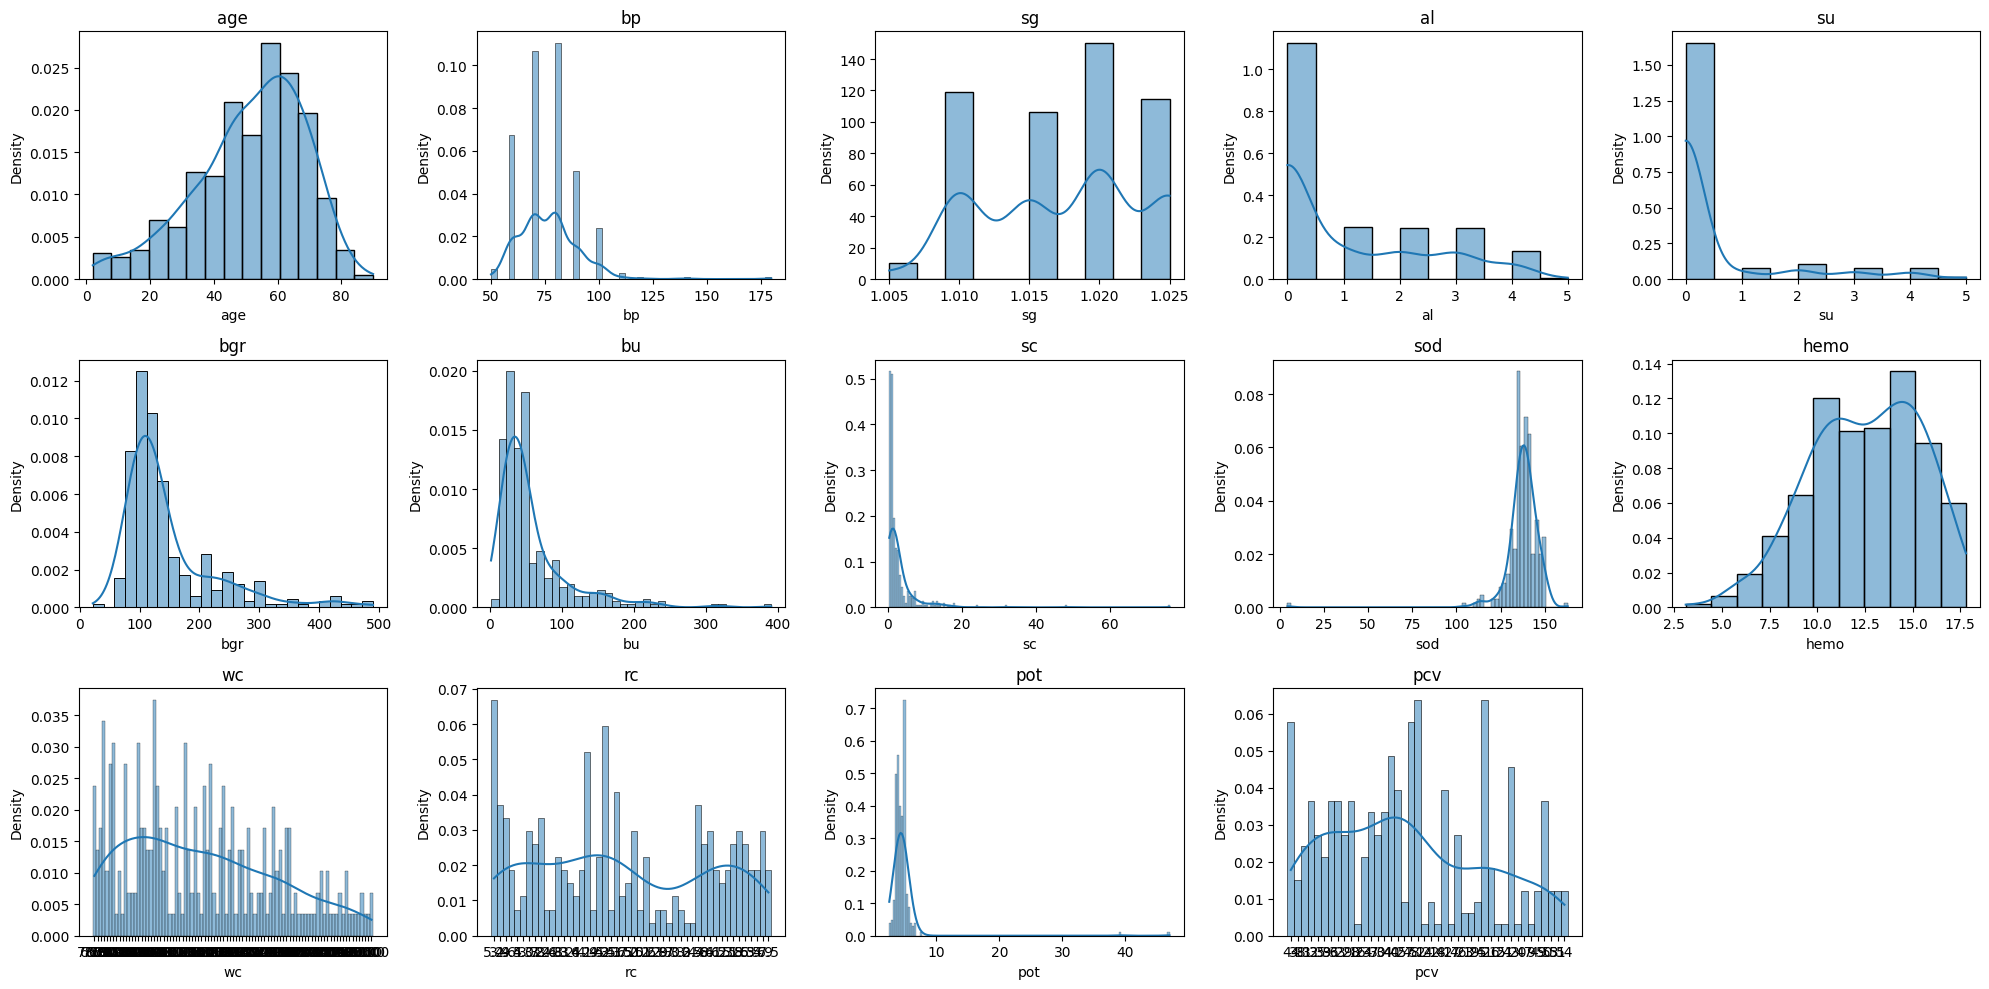

In [ ]:
selected_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'hemo', 'wc', 'rc', 'pot', 'pcv']

# Menampilkan histogram dari masing-masing fitur
fig = plt.figure(figsize=(20, 10))
for i, column in enumerate(selected_columns):
    ax = fig.add_subplot(3, 5, i+1)
    sns.histplot(df[column], kde=True, stat='density', ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
df.skew() # cek kemiringan fitur untuk melihat detail persebaran data

<ipython-input-12-14d3941a3ecf>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew() # cek kemiringan fitur untuk melihat detail persebaran data


age     -0.668259
bp       1.605429
sg      -0.172444
al       0.998157
su       2.464262
bgr      2.010773
bu       2.634374
sc       7.509538
sod     -6.996569
pot     11.582956
hemo    -0.335095
pcv     -0.433679
wc       1.621589
rc      -0.183329
dtype: float64



---



Dilihat dari nilai skewness dan diagram distribusi di atas atribut 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', kami mengganti nilai atribut NaN menggunakan median karena beberapa atribut memiliki kemiringan ke kanan dan ke kiri. Atribut lainnya kami menggunakan modus mengganti nilai NaN karena variasi atribut tersebut sedikit



---



### Nilai NaN yang diganti dengan median

In [ ]:
df["age"] = df["age"].replace(np.NaN, df["age"].median())

In [ ]:
# Daftar kolom yang ingin diisi nilai NaN dengan median
columns = ['bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

# Loop melalui setiap kolom dan ganti NaN dengan median
for column in columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

### Nilai NaN yang diganti dengan modus

In [ ]:
modus = ['bp', 'sg', 'al', 'su']

In [ ]:
# Loop melalui setiap kolom dan ganti NaN dengan modus
for column in modus:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

In [ ]:
#Mengecek Nilai setiap atribut data
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Nilai unik untuk kolom '{column}': {unique_values}\n")

Nilai unik untuk kolom 'age': [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 55. 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.]

Nilai unik untuk kolom 'bp': [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.]

Nilai unik untuk kolom 'sg': [1.02  1.01  1.005 1.015 1.025]

Nilai unik untuk kolom 'al': [1. 4. 2. 3. 0. 5.]

Nilai unik untuk kolom 'su': [0. 3. 4. 1. 2. 5.]

Nilai unik untuk kolom 'rbc': [nan 'normal' 'abnormal']

Nilai unik untuk kolom 'pc': ['normal' 'abnormal' nan]

Nilai unik untuk kolom 'pcc': ['notpresent' 'present' nan]

Nilai unik untuk kolom 'ba': ['notpresent' 'present' nan]

Nilai unik untuk kolom 'bgr': [121. 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98. 157.
  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159. 140.
 171. 270. 



---



Dari hasil di atas Nilai NaN pada feature yang bertipe data numerical sudah berhasil hilang dengan cara diganti dengan median dan modus



---



### Handling Nilai NaN bertipe Categorical

In [ ]:
modus2 = ['rbc', 'pc', 'pcc', 'ba', 'cad', 'appet', 'pe', 'ane', 'htn', 'dm']

In [ ]:
# Loop melalui setiap kolom dan ganti NaN dengan modus
for column in modus2:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

In [ ]:
#Mengecek Nilai setiap atribut data
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Nilai unik untuk kolom '{column}': {unique_values}\n")

Nilai unik untuk kolom 'age': [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 55. 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.]

Nilai unik untuk kolom 'bp': [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.]

Nilai unik untuk kolom 'sg': [1.02  1.01  1.005 1.015 1.025]

Nilai unik untuk kolom 'al': [1. 4. 2. 3. 0. 5.]

Nilai unik untuk kolom 'su': [0. 3. 4. 1. 2. 5.]

Nilai unik untuk kolom 'rbc': ['normal' 'abnormal']

Nilai unik untuk kolom 'pc': ['normal' 'abnormal']

Nilai unik untuk kolom 'pcc': ['notpresent' 'present']

Nilai unik untuk kolom 'ba': ['notpresent' 'present']

Nilai unik untuk kolom 'bgr': [121. 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98. 157.
  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159. 140.
 171. 270.  92. 137. 204.  

In [ ]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64



---



Dari hasil di atas Nilai NaN pada feature yang bertipe data categorical sudah berhasil hilang dengan cara diganti modus, alasan memilih modus karena feature tersebut memiliki variasi sedikit.



---



### Merubah Tipe Data

In [ ]:
#Mengecek Nilai setiap atribut data
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Nilai unik untuk kolom '{column}': {unique_values}\n")

Nilai unik untuk kolom 'age': [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 55. 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.]

Nilai unik untuk kolom 'bp': [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.]

Nilai unik untuk kolom 'sg': [1.02  1.01  1.005 1.015 1.025]

Nilai unik untuk kolom 'al': [1. 4. 2. 3. 0. 5.]

Nilai unik untuk kolom 'su': [0. 3. 4. 1. 2. 5.]

Nilai unik untuk kolom 'rbc': ['normal' 'abnormal']

Nilai unik untuk kolom 'pc': ['normal' 'abnormal']

Nilai unik untuk kolom 'pcc': ['notpresent' 'present']

Nilai unik untuk kolom 'ba': ['notpresent' 'present']

Nilai unik untuk kolom 'bgr': [121. 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98. 157.
  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159. 140.
 171. 270.  92. 137. 204.  

In [ ]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object



---



Dilihat dari detail data unik atribut age, wc, pcv, dan rc terdapat kekeliruan tipe data, sehingga diharuskan untuk mengganti menjadi tipe data yang seharusnya.



---



In [ ]:
#Merubah tipe data atribut (age, wc, pcv) menjadi integer
df[['age', 'wc', 'pcv']] = df[['age', 'wc', 'pcv']].astype('int64')

In [ ]:
#Merubah tipe data atribut rc menjadi float
df['rc'] = df['rc'].astype('float64')

In [ ]:
columns_to_info = ['rc', 'age', 'wc', 'pcv']

for column in columns_to_info:
    print(f"Info untuk kolom '{column}':")
    print(df[column].dtypes)
    print()

Info untuk kolom 'rc':
float64

Info untuk kolom 'age':
int64

Info untuk kolom 'wc':
int64

Info untuk kolom 'pcv':
int64





---



Dari feature yang dipilih di atas, tipe datanya sudah berubah sesuai semestinya



---



### Data Labeling

Data labeling dibutuhkan untuk mengubah cetagorical data menjadi numerical data. Contohnya `Yes` atau `No` menjadi `1` atau `0`



---



In [ ]:
from sklearn import preprocessing

In [ ]:
col = ['rbc', 'pcc', 'pc', 'ba', 'htn', 'dm', 'cad', 'pe', 'ane']
encoder = preprocessing.LabelEncoder()
for col in col:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df[['appet', 'classification']] = df[['appet', 'classification']].replace(to_replace={'good':'1', 'ckd':'1', 'notckd':'0', 'poor':'0'})

In [ ]:
df[['classification', 'appet']] = df[['classification', 'appet']].astype('int64')

In [ ]:
print(df.dtypes)

age                 int64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object




---



Berikut perubahan data setelah dilakukan labeling
* Here = 1, present = 1, normal = 1, yes = 1, notpresent = 0, abnormal = 0, no = 0, good = 1 , poor = 0, ckd = 1, notckd = 0.





---



### Pemilihan Fitur

<Axes: >

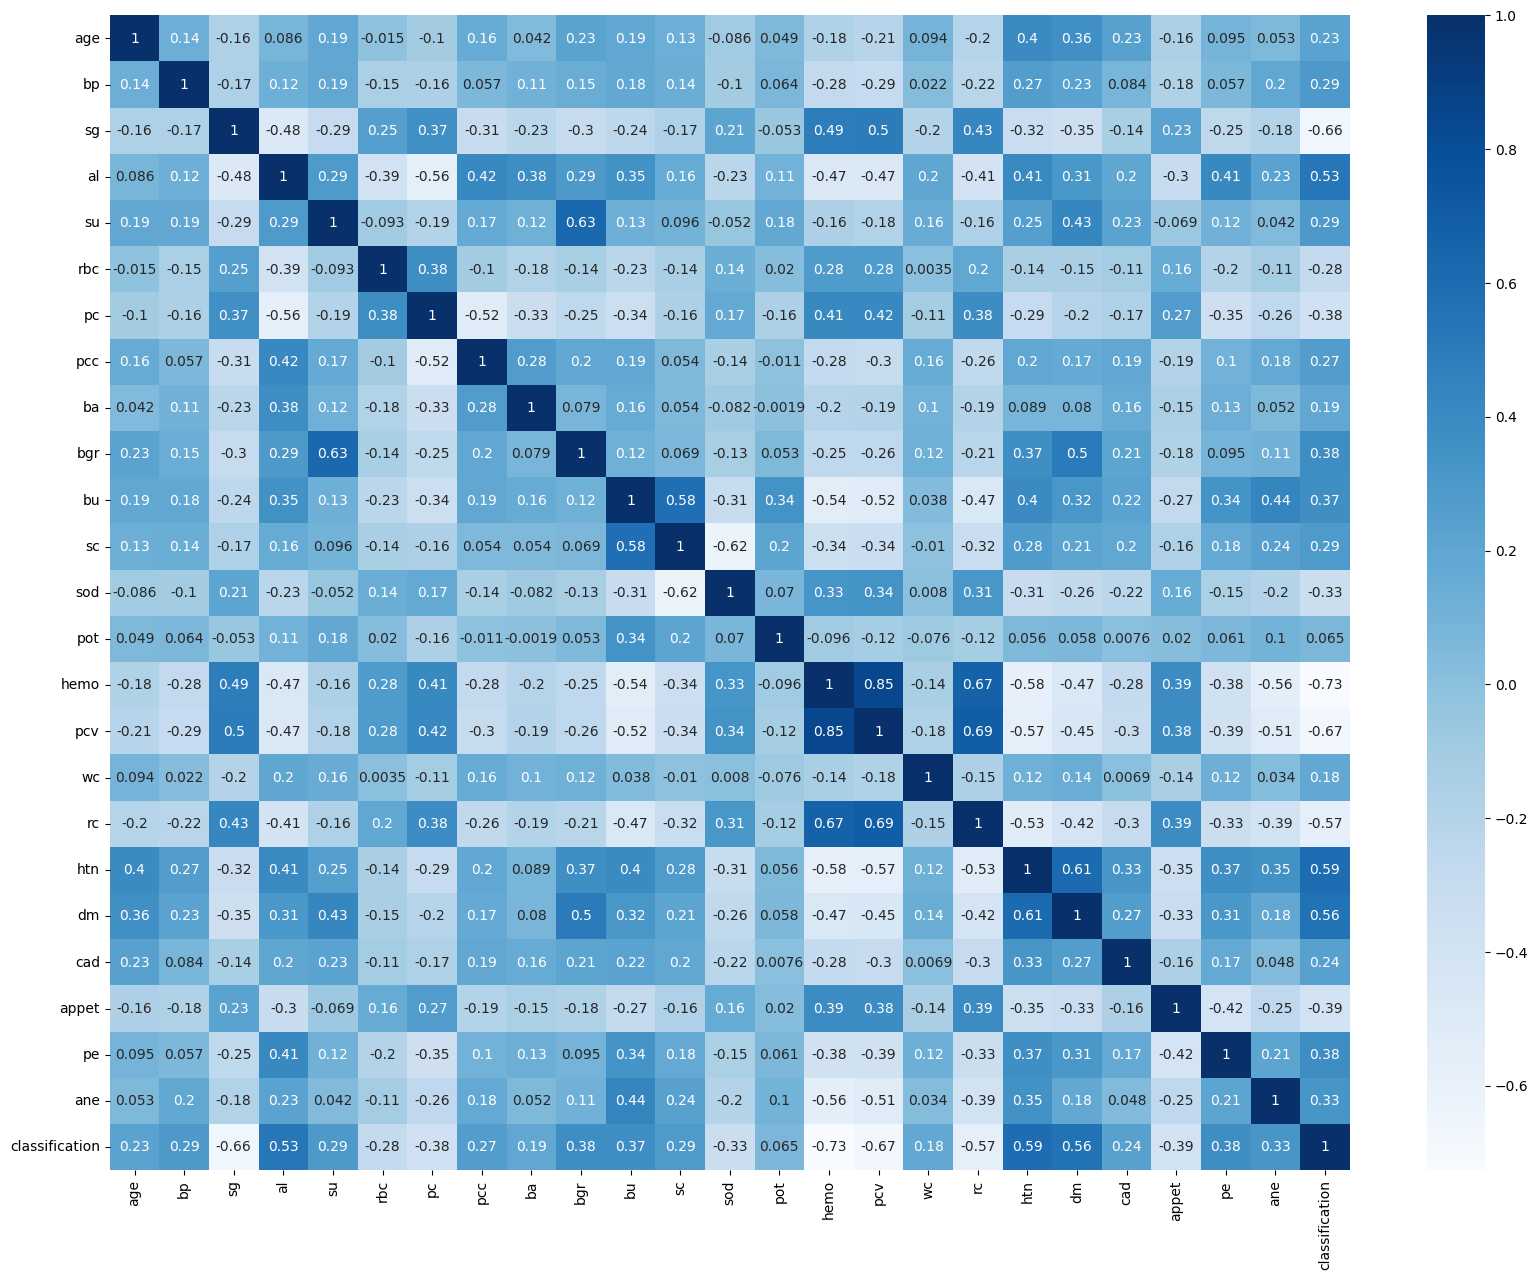

In [ ]:
# menampilkan korelasi antar fitur
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='Blues')



---



*   Terdapat korelasi tinggi antara `pcv` dengan `hemo`, maka dari itu kita hanya menggunakan salah satunya saja yaitu `hemo`. Droping fitur ini memiliki alasan untuk menghindari multikolinearitas dalam pembuatan model nanti.
*   Fitur `pot` memilki korelasi rendah dengan `classification` dengan korelasi mendekati 0. Maka dari itu, fitur `pot` harus didrop.





---



In [ ]:
df.drop(["pcv"], axis=1, inplace=True)

In [ ]:
df.drop(["pot"], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    int64  
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    int64  
 6   pc              400 non-null    int64  
 7   pcc             400 non-null    int64  
 8   ba              400 non-null    int64  
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  hemo            400 non-null    float64
 14  wc              400 non-null    int64  
 15  rc              400 non-null    float64
 16  htn             400 non-null    int64  
 17  dm              400 non-null    int



---



Dapat dilihat dari info di atas feature `pot` dan `pcv`sudah berhasil terhapus



---



### Spliting dan Standarization Data

Standarisasi dilakukan untuk menyamakan skala pada setiap feature pada data. Hal ini dilakukan untuk menghindari dominasi satu fitur,



---



In [ ]:
X = df.drop("classification", axis=1)
y = df["classification"]

In [ ]:
scaler = StandardScaler()
features = scaler.fit_transform(X)
features

array([[-0.21003135,  0.25421378,  0.4214856 , ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [-2.62723421, -1.97247624,  0.4214856 , ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.615355  ,  0.25421378, -1.4210744 , ..., -1.96927621,
        -0.4843221 ,  2.38047614],
       ...,
       [-2.33245337,  0.25421378,  0.4214856 , ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [-2.03767254, -1.23024623,  1.3427656 , ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.37953033,  0.25421378,  1.3427656 , ...,  0.50780078,
        -0.4843221 , -0.42008403]])



---



Spliting data dilakukan untuk membuat data training dan testing pada model yang akan dibuat.



---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)



---



Kami menggunakan data training sebanyak 70% dari total data. Sementara data testing yang akan digunakan sebanyak 30%.



---



# Ringkasan Metode
Metode ensemble yang kami gunakan adalah Voting Classifier. `Voting Classifier` adalah suatu metode dalam ensemble learning yang menggabungkan prediksi dari beberapa model berbeda dan memilih hasil prediksi berdasarkan mayoritas atau berdasarkan bobot yang diberikan pada masing-masing model.
Berikut classifier yang kami gunakan, yaitu:

Decision Tree, membantu mengidentifikasi fitur atau variabel yang paling berpengaruh dalam membuat keputusan.
KNN, algoritma yang berfungsi untuk melakukan klasifikasi yang diambil dari k tetangga terdekatnya
SVC, bekerja dengan mencari hyperplane terbaik yang dapat memisahkan data ke dalam kelas yang berbeda.



---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Baseline Model

Baseline yang kami buat menggunakan nilai default pada setiap classifiernya



---



In [ ]:
# Baseline Model
# Membuat tiga model klasifikasi: Decision Tree, K-Nearest Neighbors, dan Support Vector Classifier (SVC)
clf1 = DecisionTreeClassifier()
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = SVC()

# Membuat Ensemble Model menggunakan Hard Voting
# Hard Voting: Memilih kelas yang diprediksi oleh mayoritas dari model base
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='hard')

# Melatih model Decision Tree pada data latih
clf1 = clf1.fit(X_train, y_train)

# Melatih model K-Nearest Neighbors pada data latih
clf2 = clf2.fit(X_train, y_train)

# Melatih model Support Vector Classifier (SVC) pada data latih
clf3 = clf3.fit(X_train, y_train)

# Melatih Ensemble Model pada data latih
eclf = eclf.fit(X_train, y_train)

In [ ]:
# Iterasi melalui empat model: Decision Tree, K-Nearest Neighbors, Support Vector Classifier (SVC), dan Ensemble Model
for clf, label in zip([clf1, clf2, clf3, eclf], ['DecisionTree', 'KNeighbors', 'SVC', 'Ensemble']):
    # Evaluasi model menggunakan cross-validation dengan 5 lipatan (cv=5)
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    # Menampilkan hasil akurasi rata-rata dan deviasi standar dari cross-validation
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.94 (+/- 0.02) [DecisionTree]
Accuracy: 0.96 (+/- 0.01) [KNeighbors]
Accuracy: 0.98 (+/- 0.02) [SVC]
Accuracy: 0.97 (+/- 0.02) [Ensemble]




---



Model Decision Tree (DecisionTree) memiliki akurasi = 95% dan K-Nearest Neighbors (KNeighbors) memiliki memiliki akurasi 96% yang dimana kedua model akurasi sama-sama relatif tinggi, yaitu di persentase 90-an. Kemudian Model Support Vector Classifier (SVC) memiliki akurasi = 98% dan Namun Ensemble Model (Ensemble) memiliki akurasi yang lebih rendah dibandingkan SVC, yaitu sekitar 97%.
Kemudian Deviasi standar (standard deviation) dari cross-validation untuk semua model relatif rendah, menunjukkan bahwa performa model cukup stabil saat diuji pada berbagai lipatan data validasi silang



---



In [ ]:
eclf = eclf.predict(X_test)
# Ensemble (VotingClassifier)
print("Ensemble (VotingClassifier) - Accuracy:", accuracy_score(y_test, eclf))
print("Ensemble (VotingClassifier) - Classification Report:\n", classification_report(y_test, eclf))
#print("Ensemble (VotingClassifier) - Confusion Matrix:\n", confusion_matrix(y_test, eclf))
cm1 = confusion_matrix(y_test, eclf)

Ensemble (VotingClassifier) - Accuracy: 0.9916666666666667
Ensemble (VotingClassifier) - Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



<Axes: >

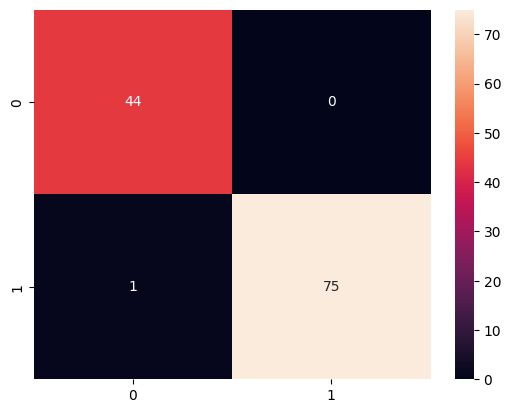

In [ ]:
#Pembuatan Heatmap untuk visualisasi Confusion Matrix
cm1 = confusion_matrix(y_test, eclf)
sns.heatmap(pd.DataFrame(cm1), annot=True)



---



Dilihat dari confusioon matrix matrix terdapat TP(pasien yang sebenarnya memiliki CDK dan diprediksi benar) = 75, TN (pasien yang sebenarnya tidak memiliki CDK dan diprediksi benar) = 44. FP(Jumlah pasien yang sebenarnya tidak memiliki CDK tetapi diprediksi memiliki CDK) = 0, FN(Jumlah pasien yang sebenarnya memiliki CDK tetapi diprediksi tidak memiliki CDK) = 1



---



## Eksplorasi Model

Pada eksplorasi model, kami menggunakan 3 skema voting classifier, yaitu:


1.   Skema 1 menggunakan Hard Voting
2.   Skema 2 menggunakan Soft Voting
3.   Skema 3 menggunakan Weighted Voting



### Best parameter of classifier

Dalam upaya mencapai hasil terbaik dalam pembuatan model machine learning, kami melakukan pencarian parameter terbaik untuk setiap classifier yang digunakan menggunakan `GridSearchCV`. Setelah parameter terbaik ditemukan, best parameter tersebut digunakan untuk membangun model yang lebih baik dan akurat. Secara keseluruhan, pencarian parameter terbaik adalah langkah penting dalam proses pembuatan model dan dapat sangat meningkatkan kinerja model. Dengan `GridSearchCV`, kami telah mencoba berbagai kombinasi parameter dan menemukan set parameter yang memberikan hasil terbaik.



---



In [ ]:
# Hyperparameter tuning untuk DecisionTreeClassifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, scoring='accuracy', cv=5)
grid_search_dt.fit(X_train, y_train)

# Hyperparameter tuning untuk KNeighborsClassifier
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='accuracy', cv=5)
grid_search_knn.fit(X_train, y_train)

# Hyperparameter tuning untuk SVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search_svc = GridSearchCV(SVC(), param_grid_svc, scoring='accuracy', cv=5)
grid_search_svc.fit(X_train, y_train)

# Tampilkan parameter terbaik untuk masing-masing model
print("DecisionTreeClassifier - Best Parameters:", grid_search_dt.best_params_)
print("KNeighborsClassifier - Best Parameters:", grid_search_knn.best_params_)
print("SVC - Best Parameters:", grid_search_svc.best_params_)

DecisionTreeClassifier - Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
KNeighborsClassifier - Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
SVC - Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}




---



Didapatkan best parameter dari setiap classifiernya yaitu:

* Decision Tree = `{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}`
* KNN = `{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}`
* SVC = `{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}`



---



### Skema 1 (Hard voting)

In [ ]:
# Buat model dengan parameter terbaik dari setiap model
best_dt = grid_search_dt.best_estimator_
best_knn = grid_search_knn.best_estimator_
best_svc = grid_search_svc.best_estimator_

# Buat ulang Ensemble dengan model terbaik
best_eclf = VotingClassifier(estimators=[('dt', best_dt), ('knn', best_knn), ('svc', best_svc)], voting='hard')

best_eclf = best_eclf.fit(X_train, y_train)

# Evaluasi model terbaik menggunakan cross-validation
for clf, label in zip([best_dt, best_knn, best_svc, best_eclf], ['DecisionTree', 'KNeighbors', 'SVC', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.96 (+/- 0.04) [DecisionTree]
Accuracy: 0.96 (+/- 0.02) [KNeighbors]
Accuracy: 0.99 (+/- 0.01) [SVC]
Accuracy: 0.99 (+/- 0.02) [Ensemble]




---



Model Decision Tree (DecisionTree) dan K-Nearest Neighbors (KNeighbors) memiliki akurasi yang relatif tinggi, yaitu sekitar 96%.Model Support Vector Classifier (SVC) dan Ensemble Model (Ensemble) memiliki akurasi yang lebih tinggi, yaitu sekitar 99%.
Kemudian nilai Deviasi standar (standard deviation) skema 1 berbeda dari baseline model namun nilai untuk semua modelnya relatif rendah, yang menunjukkan bahwa performa model cukup stabil saat diuji pada berbagai lipatan data validasi silang



---



In [ ]:
y_pred_eclf = best_eclf.predict(X_test)
# Ensemble (VotingClassifier)
print("Ensemble (VotingClassifier) - Accuracy:", accuracy_score(y_test, y_pred_eclf))
print("Ensemble (VotingClassifier) - Classification Report:\n", classification_report(y_test, y_pred_eclf))
#print("Ensemble (VotingClassifier) - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_eclf))


Ensemble (VotingClassifier) - Accuracy: 0.9833333333333333
Ensemble (VotingClassifier) - Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.97      0.99        76

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



<Axes: >

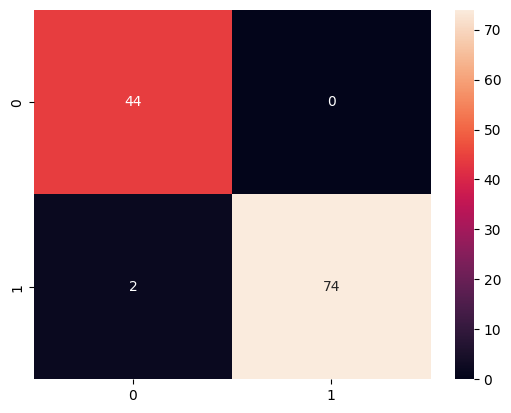

In [ ]:
#Pembuatan Heatmap untuk visualisasi Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred_eclf)
sns.heatmap(pd.DataFrame(cm2), annot=True)



---



Dilihat dari confusioon matrix matrix terdapat TP(pasien yang sebenarnya memiliki CDK dan diprediksi benar) = 74, TN (pasien yang sebenarnya tidak memiliki CDK dan diprediksi benar) = 44. FP(Jumlah pasien yang sebenarnya tidak memiliki CDK tetapi diprediksi memiliki CDK) = 0, FN(Jumlah pasien yang sebenarnya memiliki CDK tetapi diprediksi tidak memiliki CDK) = 2



---



### Skema 2 (Soft Voting)

In [ ]:
sSVC = SVC(kernel = 'rbf', probability = True, gamma = 0.1, C = 0.1)
# Buat ulang Ensemble dengan model terbaik
soft_eclf = VotingClassifier(estimators=[('dt', best_dt), ('knn', best_knn), ('SVC', sSVC)], voting='soft')

soft_eclf = soft_eclf.fit(X_train, y_train)

# Evaluasi model terbaik menggunakan cross-validation
for clf, label in zip([best_dt, best_knn, sSVC, soft_eclf], ['DecisionTree', 'KNeighbors', 'SVC', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.96 (+/- 0.04) [DecisionTree]
Accuracy: 0.96 (+/- 0.02) [KNeighbors]
Accuracy: 0.99 (+/- 0.01) [SVC]
Accuracy: 0.99 (+/- 0.01) [Ensemble]




---



Untuk skema ini setiap model memiliki akurasi yang sama dengan skema 1 dan STD(standar deviasi) pada skema ini juga sama dengan skema 1



---



In [ ]:
test_pred_eclf = soft_eclf.predict(X_test)
# Ensemble (VotingClassifier)
print("Ensemble (VotingClassifier) - Accuracy:", accuracy_score(y_test, test_pred_eclf))
print("Ensemble (VotingClassifier) - Classification Report:\n", classification_report(y_test, test_pred_eclf))
#print("Ensemble (VotingClassifier) - Confusion Matrix:\n", confusion_matrix(y_test, test_pred_eclf))

Ensemble (VotingClassifier) - Accuracy: 0.9916666666666667
Ensemble (VotingClassifier) - Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



<Axes: >

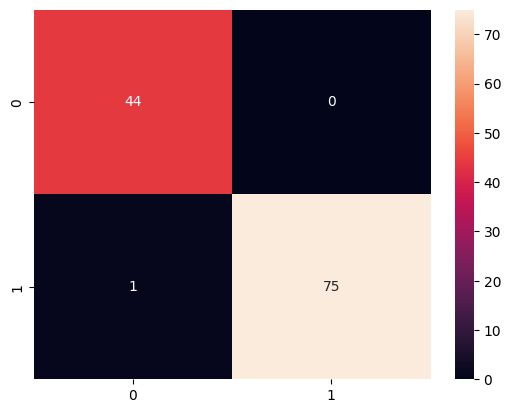

In [ ]:
#Pembuatan Heatmap untuk visualisasi Confusion Matrix
cm3 = confusion_matrix(y_test, test_pred_eclf)
sns.heatmap(pd.DataFrame(cm3), annot=True)



---



Dilihat dari confusioon matrix matrix terdapat TP(pasien yang sebenarnya memiliki CDK dan diprediksi benar) = 75, TN (pasien yang sebenarnya tidak memiliki CDK dan diprediksi benar) = 44. FP(Jumlah pasien yang sebenarnya tidak memiliki CDK tetapi diprediksi memiliki CDK) = 0, FN(Jumlah pasien yang sebenarnya memiliki CDK tetapi diprediksi tidak memiliki CDK) = 1



---



### Skema 3 (Weighted Voting)

In [ ]:
# Buat ulang Ensemble dengan model terbaik
voting_clf_weighted = VotingClassifier(estimators=[('dt', best_dt), ('knn', best_knn), ('svc', sSVC)], voting='soft', weights = [2,1,1])

voting_clf_weighted = voting_clf_weighted.fit(X_train, y_train)

# Evaluasi model terbaik menggunakan cross-validation
for clf, label in zip([best_dt, best_knn, sSVC, voting_clf_weighted], ['DecisionTree', 'KNeighbors', 'SVC', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.96 (+/- 0.03) [DecisionTree]
Accuracy: 0.96 (+/- 0.02) [KNeighbors]
Accuracy: 0.99 (+/- 0.01) [SVC]
Accuracy: 0.96 (+/- 0.03) [Ensemble]




---



Untuk skema ini setiap model memiliki akurasi yang berbda dengan skema 2:
* Accuracy: 0.97 [DecisionTree]
* Accuracy: 0.96 [KNeighbors]
* Accuracy: 0.99 [SVC]
* Accuracy: 0.96 [Ensemble]

Namun STD(standar deviasi) pada skema ini juga sama dengan skema 1 dan 2



---



In [ ]:
param_grid_weighted = {'weights': [[1,1,1], [1,2,1], [1,1,2], [2,1,1], [2,2,1], [1,2,2]]}

grid_search_weighted = GridSearchCV(voting_clf_weighted, param_grid_weighted, cv=5)
grid_search_weighted = grid_search_weighted.fit(X_train, y_train)

In [ ]:
grid_search_weighted = grid_search_weighted.predict(X_test)
# Ensemble (VotingClassifier)
print("Ensemble (VotingClassifier) - Accuracy:", accuracy_score(y_test, grid_search_weighted))
print("Ensemble (VotingClassifier) - Classification Report:\n", classification_report(y_test, grid_search_weighted))
#print("Ensemble (VotingClassifier) - Confusion Matrix:\n", confusion_matrix(y_test, test_pred_eclf))

Ensemble (VotingClassifier) - Accuracy: 0.9916666666666667
Ensemble (VotingClassifier) - Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



<Axes: >

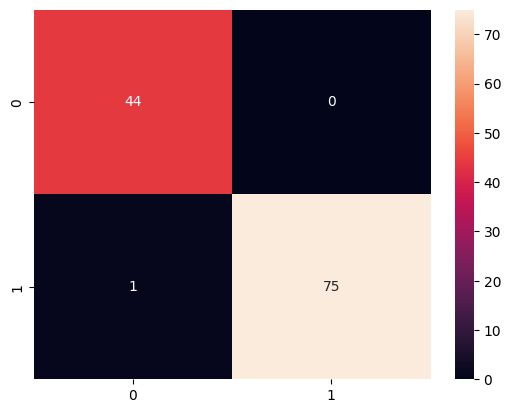

In [ ]:
cm4 = confusion_matrix(y_test, grid_search_weighted)
sns.heatmap(pd.DataFrame(cm4), annot=True)



---



Dilihat dari confusioon matrix matrix terdapat TP(pasien yang sebenarnya memiliki CDK dan diprediksi benar) = 75, TN (pasien yang sebenarnya tidak memiliki CDK dan diprediksi benar) = 44. FP(Jumlah pasien yang sebenarnya tidak memiliki CDK tetapi diprediksi memiliki CDK) = 0, FN(Jumlah pasien yang sebenarnya memiliki CDK tetapi diprediksi tidak memiliki CDK) = 1



---



#### **Hasil dan Analisis**
Metode ensemble yang kami gunakan adalah Voting Classifier, dimana classifier yang kami gunakan, yaitu:
* Decision Tree, membantu mengidentifikasi fitur atau variabel yang paling berpengaruh dalam membuat keputusan.
* KNN, algoritma yang berfungsi untuk melakukan klasifikasi yang diambil dari k tetangga terdekatnya
* SVC, bekerja dengan mencari hyperplane terbaik yang dapat memisahkan data ke dalam kelas yang berbeda.



---



Untuk uji model dari metode yang sudah kami buat adalah confusion matrix. Confusion Matrix adalah suatu tabel yang digunakan dalam evaluasi kinerja model klasifikasi pada data uji, khususnya untuk masalah klasifikasi biner (dua kelas). Confusion matrix menyajikan perbandingan antara prediksi model dan nilai sebenarnya dari data uji.  Dalam konteks klasifikasi biner kasus, confusion matrix memiliki empat elemen utama:
* True Positive (TP): Jumlah pasien yang sebenarnya memiliki CDK dan diprediksi benar
* True Negative (TN): Jumlah pasien yang sebenarnya tidak memiliki CDK dan diprediksi benar
* False Positive (FP): Jumlah pasien yang sebenarnya tidak memiliki CDK tetapi diprediksi memiliki CDK
* False Negative (FN): Jumlah pasien yang sebenarnya memiliki CDK tetapi diprediksi tidak memiliki CDK.

Alasan pemilihan confusion matrix untuk menguji model adalah karena menyediakan informasi yang lebih rinci tentang performa model klasifikasi, khususnya pada kasus klasifikasi biner. Pada kasus

---

Untuk mendapatkan hasil maksimal, kami melakukan hyperparameter tuning pada classifier yang digunakan. Didapatkan best parameter dari setiap classifier sebagai berikut:

* Decision Tree = {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
* KNN = {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
* SVC = {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

---

Didapatkan hasil dari setiap model sebegai berikut

* Baseline model:

`Accuracy = 0.99167`

`Precision` = `Not-CKD : 0.98, CKD : 1.00`

`Recall` = `Not-CKD : 1.00, CKD : 0.99`

`F-1 score` = `Not-CKD : 0.99, CKD : 0.99`

`Support` = `Not-CKD : 44, CKD : 76`

`Confusion Matrix` = `TP = 75`, `TN = 44`. `FP = 0`, `FN = 1`
  
* Hard voting:

`Accuracy = 0.98333`

`Precision` = `Not-CKD : 0.96, CKD : 1.00`

`Recall` = `Not-CKD : 1.00, CKD : 0.97`

`F-1 score` = `Not-CKD : 0.98, CKD : 0.99`

`Support` = `Not-CKD : 44, CKD : 76`

`Confusion Matrix` = `TP = 74`, `TN = 44`. `FP = 0`, `FN = 2`

* Soft voting

`Accuracy = 0.99167`

`Precision` = `Not-CKD : 0.98, CKD : 1.00`

`Recall` = `Not-CKD : 1.00, CKD : 0.99`

`F-1 score` = `Not-CKD : 0.99, CKD : 0.99`

`Support` = `Not-CKD : 44, CKD : 76`

`Confusion Matrix` = `TP = 75`, `TN = 44`. `FP =
0`, `FN = 1`

* Weighted voting

`Accuracy = 0.99167`

`Precision` = `Not-CKD : 0.98, CKD : 1.00`

`Recall` = `Not-CKD : 1.00 , CKD : 0.99`

`F-1 score` = `Not-CKD : 0.99, CKD : 0.99`

`Support` = `Not-CKD : 44, CKD : 76`

`Confusion Matrix` = `TP = 75`, `TN = 44`. `FP = 0`, `FN = 1`

Hasil menunjukkan bahwa model baseline, soft voting, dan weighted voting memiliki tingkat akurasi yang sama, yaitu 0.99167, sedangkan hard voting memiliki tingkat akurasi sedikit lebih rendah, yaitu 0.98333. Dalam hal presisi, semua model menunjukkan hasil yang sangat baik, dengan nilai presisi 1.00 untuk kelas CKD pada semua model.

Dalam hal recall, model baseline, soft voting, dan weighted voting berhasil mengidentifikasi semua kasus Not-CKD dengan benar (recall = 1.00), sedangkan hard voting sedikit kurang dalam mengidentifikasi kelas CKD (recall = 0.97).

F-1 score, yang merupakan rata-rata harmonik dari presisi dan recall, juga menunjukkan hasil yang sangat baik untuk semua model, dengan nilai tertinggi pada model baseline, soft voting, dan weighted voting (F-1 score = 0.99 untuk kedua kelas).

Confusion matrix menunjukkan bahwa model baseline, soft voting, dan weighted voting hanya membuat satu kesalahan dalam mengklasifikasikan data (FN = 1), sedangkan hard voting membuat dua kesalahan (FN = 2).

Secara keseluruhan, hasil ini menunjukkan bahwa metode ensemble Voting Classifier dengan kombinasi Decision Tree, KNN, dan SVC dapat memberikan hasil yang sangat baik dalam klasifikasi data ini, terutama ketika menggunakan metode soft voting atau weighted voting.




---



#### **Kesimpulan**
Berdasarkan analisis yang telah dilakukan, metode ensemble Voting Classifier dengan kombinasi Decision Tree, KNN, dan SVC telah terbukti efektif dalam klasifikasi data ini. Model baseline, soft voting, dan weighted voting menunjukkan performa yang sangat baik dengan tingkat akurasi 0.99167, presisi 1.00 untuk kelas CKD, dan recall 1.00 untuk kelas Not-CKD. Meskipun hard voting memiliki tingkat akurasi sedikit lebih rendah (0.98333), performanya masih cukup baik.